# Oasis Infobytes : Data Science Internship

### Task 5 : To predict how much product will people buy based on factors such as amount spend on advertisement

#### Intern name : Disha Satish Jadhav
#### February- P2 Batch Oasis Infobyte SIP

#### Step 1 : Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Step 2 : Loading dataset

In [2]:
data = pd.read_csv("C:\\Users\\disha\\Downloads\\Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- The huge amount is spend on TV advertisement which is 147 dollars and the minimum amount spend on radio is 23 dollars. 

In [7]:
data.shape

(200, 4)

In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Step 3 : Exploratory data analysis

D:\Anaconda_\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda_\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda_\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


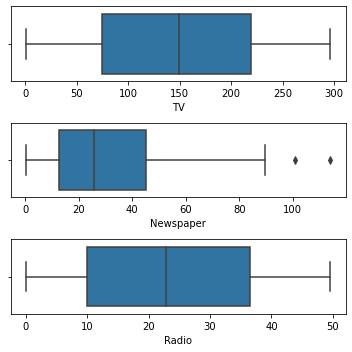

In [9]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

- There is no cosiderable outlier in dataset.

D:\Anaconda_\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


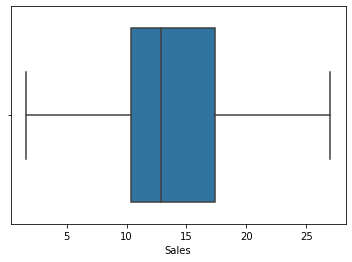

In [10]:
sns.boxplot(data['Sales'])
plt.show()
     

- There is no outlier detected in sales variable

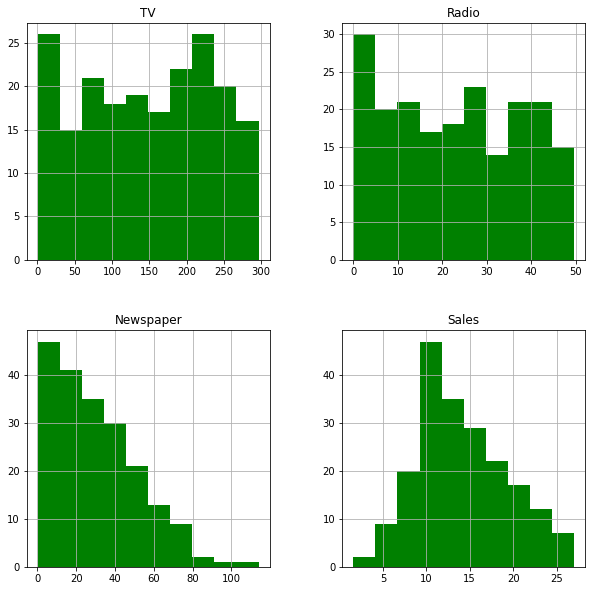

In [11]:
data.hist( bins = 10, figsize = (10,10),color = 'green')
plt.show()

- From above histogram the maximum budget spend on TV for advertisement and minimum budget spend on newspaper

<AxesSubplot:>

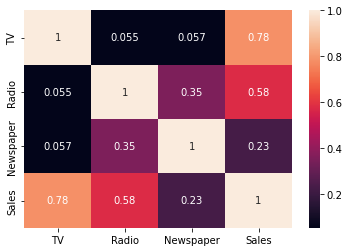

In [12]:
sns.heatmap(data.corr(),annot= True)

- From above heatmap TV is highly correlated with the sales

#### Step 4 : Data preprocessing

In [13]:
# Performing Multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
features = ['TV','Radio']

In [15]:
X = data[features]
y = data['Sales']

#### Step 5 : Model training

In [16]:
model = LinearRegression()
model = model.fit(X,y)

In [17]:
print('intercept: = bO', model.intercept_)
print('slope:= b1 & b2',model.coef_)

intercept: = bO 2.9210999124051362
slope:= b1 & b2 [0.04575482 0.18799423]


### Step 5 : Model prediction

In [18]:
Y_Pred = model.predict(X)
print('Predicted response:', Y_Pred)


Predicted response: [20.55546463 12.34536229 12.33701773 17.61711596 13.22390813 12.51208449
 11.71821241 12.10551553  3.7093792  12.55169696  7.0358597  17.25652015
 10.60866187  8.81095051 18.44466773 20.82891539 12.90386507 23.24107626
  9.94121476 14.15384619 18.12139161 14.74206357  6.51417168 16.54402663
  8.14035215 15.6080206  14.96769383 17.0463346  19.39954145  9.15929748
 21.64292187 11.35791808  7.65045928 18.83346334  7.56302763 16.99280099
 23.36720719 15.6258994   9.91257829 20.4405801  16.37872122 17.29870935
 21.5621537  13.96692266  8.9009974  15.16263814  8.88644967 21.69944046
 16.28690268  8.18162949 12.64569407  9.31962792 20.66180115 19.96126242
 20.35512357 21.30864743  8.53774783 12.76239488 21.89072858 18.10746914
  5.74497097 22.90418658 16.78413768 13.18474853 16.96570907  7.82652846
  8.98703456 12.02066194 18.95313425 21.09369037 17.78350693 10.63329605
 10.35113844  9.91334008 17.30983543 11.90970399  4.48014809 13.79239059
  8.78920329  9.67621401 11.436

In [19]:
r2 = model.score(X,y)
print('Coefficient of detremination:', r2)

Coefficient of detremination: 0.8971942610828957


In [20]:
new_x = [[500,200]]
print(model.predict(new_x))

[63.39735279]


D:\Anaconda_\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


- The above output suggests that if we invest 500 dollars on TV and 200 dollars on Radio advertising we can expect to sell 63 units.

# Thank You !